# Evaluation of Inpho projects results - Camera: UCE-M3<br>

"""<br>
Compare the Reality Studio results with Match-AT results, which deploys different number of GCPs and CPs (all GCP; 4 GCP; 9 GCP;
15 GCP). <br>
The comparison occurs regarding the following parameters:

"""


In [19]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from _parser_Inpho_prj_results import Inpho_prj_accuracy, Exterior_Orientation_Parser

In [20]:
def _parse_RS_residuals(file_path: str):
    pt_residuals_list = []
    with open(file_path, 'r') as res_file:
        res_lines = res_file.readlines()[1:32]
        for line in res_lines:
            l1 = line.rstrip().split()
            if l1 is not []:
                pt_residuals = [float(l) for l in l1[2:] if l]
                pt_residuals.append(int(l1[0]))
                pt_residuals_list.append(pt_residuals)
    return pt_residuals_list

In [21]:
""""Parse Inpho projects"""
GCP_path = './data/UCE_M3_dataset/PP_CP_Koordinaten_1.txt'
project_path_list = ['./data/UCE_M3_dataset/Inpho_projects/LowerWeigh/project_UCE_M3_rgb-4GCP',
                     './data/UCE_M3_dataset/Inpho_projects/LowerWeigh/project_UCE_M3_rgb-15GCP',
                     './data/UCE_M3_dataset/Inpho_projects/LowerWeigh/project_UCE_M3_rgb']

prj_4GCP_Inpho = Inpho_prj_accuracy(
    project_path=project_path_list[0], gcp_path=GCP_path)
_ = prj_4GCP_Inpho.run()
prj_15GCP_Inpho = Inpho_prj_accuracy(
    project_path=project_path_list[1], gcp_path=GCP_path)
_ = prj_15GCP_Inpho.run()
prj_33GCP_Inpho = Inpho_prj_accuracy(
    project_path=project_path_list[2], gcp_path=GCP_path)
_ = prj_33GCP_Inpho.run()

print('Log file parser is done')

Log file parser is done


In [22]:
"""Parse RS project"""
# Points RMS
CP_RMS_RS_4GCP = [0.043, 0.032, 0.040]
CP_RMS_RS_15GCP = [0.034, 0.029, 0.038]
CP_RMS_RS_33GCP = [0.019, 0.022, 0.042]
# Parse residuals
RS_res_file_list = ['./data/UCE_M3_dataset/RS_projects/4GCP_Residuals.txt',
                    './data/UCE_M3_dataset/RS_projects/15GCP_Residuals.txt',
                    './data/UCE_M3_dataset/RS_projects/33GCP_Residuals.txt']
Residual_RS_4gcp = _parse_RS_residuals(RS_res_file_list[0])
Residual_RS_15gcp = _parse_RS_residuals(RS_res_file_list[1])
Residual_RS_33gcp = _parse_RS_residuals(RS_res_file_list[2])

In [48]:
"""RMSE-BARPLOT"""

fig = make_subplots(rows=3, cols=1, subplot_titles=[
                    "4 GCP", "15 GCP", "33 GCP"])
x_axis = ["RMSE-X[m]", "RMSE-Y[m]", "RMSE-Z[m]"]

# Row 1, col 1
fig.append_trace(go.Bar(
    name="Project-A: Match-AT",
    x=x_axis,
    y=prj_4GCP_Inpho.cp_RMS,
    marker_color='navy',
    text=[str(txt) for txt in prj_4GCP_Inpho.cp_RMS],
    textposition="inside",
    legendgroup='1'
),
    row=1,
    col=1
)
fig.append_trace(go.Bar(
    name="Project-B: ArcGIS RS",
    x=x_axis,
    y=CP_RMS_RS_4GCP,
    marker_color='red',
    text=[str(txt) for txt in CP_RMS_RS_4GCP],
    textposition="inside",
    legendgroup='1'
),
    row=1,
    col=1
)

# Row 2, col 1
fig.append_trace(go.Bar(
    name="Project-A: Match-AT",
    x=x_axis,
    y=prj_15GCP_Inpho.cp_RMS,
    marker_color='navy',
    text=[str(txt) for txt in prj_15GCP_Inpho.cp_RMS],
    textposition="inside",
    legendgroup='1',
    showlegend=False
),
    row=2,
    col=1
)
fig.append_trace(go.Bar(
    name="Project-B: ArcGIS RS",
    x=x_axis,
    y=CP_RMS_RS_4GCP,
    marker_color='red',
    text=[str(txt) for txt in CP_RMS_RS_15GCP],
    textposition="inside",
    legendgroup='1',
    showlegend=False
),
    row=2,
    col=1
)

# Row 3, col 1
fig.append_trace(go.Bar(
    name="Project-A: Match-AT",
    x=x_axis,
    y=prj_33GCP_Inpho.cp_RMS,
    marker_color='navy',
    text=[str(txt) for txt in prj_33GCP_Inpho.cp_RMS],
    textposition="inside",
    legendgroup='1',
    showlegend=False
),
    row=3,
    col=1
)
fig.append_trace(go.Bar(
    name="Project-B: ArcGIS RS",
    x=x_axis,
    y=CP_RMS_RS_4GCP,
    marker_color='red',
    text=[str(txt) for txt in CP_RMS_RS_33GCP],
    textposition="inside",
    legendgroup='1',
    showlegend=False
),
    row=3,
    col=1
)

fig.update_traces(opacity=0.6, textfont_size=15, textfont_color='black',textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    # title='Check points RMS of different Inpho projects',
    xaxis1={"showgrid": False, "zeroline": False},
    yaxis1={"showgrid": True, "zeroline": False, "range": [0, 0.1], "dtick": 0.02},
    yaxis2={"showgrid": True, "zeroline": False, "range": [0, 0.1], "dtick": 0.02},
    yaxis3={"showgrid": True, "zeroline": False, "range": [0, 0.1], "dtick": 0.02},
    legend_tracegroupgap=20,
    plot_bgcolor='white'
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showgrid= True, gridcolor = 'lightgray',
                 showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("./Results/RS_analysis/CP_RMS-CompareRS-subplots.html")

In [24]:
"""[4GCP]Residual-SCATTERPLOT"""
# Compute the min/max/mean/std value of all the residuals
min_res = np.min(prj_4GCP_Inpho.cp_residual[:, :3], axis=0)
max_res = np.max(prj_4GCP_Inpho.cp_residual[:, :3], axis=0)
mean_res = np.mean(prj_4GCP_Inpho.cp_residual[:, :3], axis=0)
std_res = np.std(prj_4GCP_Inpho.cp_residual[:, :3], axis=0)

# Plotly
fig = make_subplots(rows=3, cols=1, subplot_titles=[
                    "ChP Residual-X", "ChP Residual-Y", "ChP Residual-Z"])
fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_4GCP_Inpho.cp_id],
    y=prj_4GCP_Inpho.cp_residual[:, 0],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT'
),
    row=1,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_4gcp],
    y=[pt[0] for pt in Residual_RS_4gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS'
),
    row=1,
    col=1
)


fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_4GCP_Inpho.cp_id],
    y=prj_4GCP_Inpho.cp_residual[:, 1],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT',
    showlegend=False
),
    row=2,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_4gcp],
    y=[pt[1] for pt in Residual_RS_4gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS',
    showlegend=False
),
    row=2,
    col=1
)


fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_4GCP_Inpho.cp_id],
    y=prj_4GCP_Inpho.cp_residual[:, 2],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT',
    showlegend=False
),
    row=3,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_4gcp],
    y=[pt[2] for pt in Residual_RS_4gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS',
    showlegend=False
),
    row=3,
    col=1
)


fig.update_traces(opacity=0.6)
fig.update_layout(
    title='[4GCP] Residuals at check points in Match-AT project and ArcGIS RS project',
    plot_bgcolor = 'white',
    xaxis1={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "black", "mirror": True},
    yaxis1={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'darkgray', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    xaxis2={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "black", "mirror": True},
    yaxis2={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'black', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    xaxis3={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "darkgray", "mirror": True},
    yaxis3={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'darkgray', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    legend_tracegroupgap=20
)
fig.update_xaxes = {
    "dtick": 0.2,
    "showgrid": False,
    "zeroline": False
}
fig.show()
fig.write_html("./Results/RS_analysis/CP_Residuals-4gcp.html")
print('The min residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in min_res])
print('The max residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in max_res])
print('The mean residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in mean_res])
print('The std.dev residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in std_res])

The min residual X/Y/Z for 4 camera sets are ['-0.041', '-0.038', '-0.163']
The max residual X/Y/Z for 4 camera sets are ['0.048', '0.032', '0.054']
The mean residual X/Y/Z for 4 camera sets are ['-0.008', '-0.002', '-0.040']
The std.dev residual X/Y/Z for 4 camera sets are ['0.021', '0.014', '0.046']


In [25]:
"""[15GCP]Residual-SCATTERPLOT"""
# Compute the min/max/mean/std value of all the residuals
min_res = np.min(prj_15GCP_Inpho.cp_residual[:, :3], axis=0)
max_res = np.max(prj_15GCP_Inpho.cp_residual[:, :3], axis=0)
mean_res = np.mean(prj_15GCP_Inpho.cp_residual[:, :3], axis=0)
std_res = np.std(prj_15GCP_Inpho.cp_residual[:, :3], axis=0)

# Plotly
fig = make_subplots(rows=3, cols=1, subplot_titles=[
                    "ChP Residual-X", "ChP Residual-Y", "ChP Residual-Z"])
fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_15GCP_Inpho.cp_id],
    y=prj_15GCP_Inpho.cp_residual[:, 0],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT'
),
    row=1,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_15gcp],
    y=[pt[0] for pt in Residual_RS_15gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS'
),
    row=1,
    col=1
)


fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_15GCP_Inpho.cp_id],
    y=prj_15GCP_Inpho.cp_residual[:, 1],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT',
    showlegend=False
),
    row=2,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_15gcp],
    y=[pt[1] for pt in Residual_RS_15gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS',
    showlegend=False
),
    row=2,
    col=1
)


fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_15GCP_Inpho.cp_id],
    y=prj_15GCP_Inpho.cp_residual[:, 2],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT',
    showlegend=False
),
    row=3,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_15gcp],
    y=[pt[2] for pt in Residual_RS_15gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS',
    showlegend=False
),
    row=3,
    col=1
)


fig.update_traces(opacity=0.6)
fig.update_layout(
    title='[15GCP] Residuals at check points in Match-AT project and ArcGIS RS project',
    plot_bgcolor = 'white',
    xaxis1={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "black", "mirror": True},
    yaxis1={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'darkgray', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    xaxis2={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "black", "mirror": True},
    yaxis2={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'black', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    xaxis3={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "darkgray", "mirror": True},
    yaxis3={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'darkgray', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    legend_tracegroupgap=20
)
fig.update_xaxes = {
    "dtick": 0.2,
    "showgrid": False,
    "zeroline": False
}

fig.show()
fig.write_html("./Results/RS_analysis/CP_Residuals-15gcp.html")
print('The min residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in min_res])
print('The max residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in max_res])
print('The mean residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in mean_res])
print('The std.dev residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in std_res])

The min residual X/Y/Z for 4 camera sets are ['-0.021', '-0.042', '-0.137']
The max residual X/Y/Z for 4 camera sets are ['0.057', '0.024', '0.061']
The mean residual X/Y/Z for 4 camera sets are ['0.009', '-0.005', '-0.022']
The std.dev residual X/Y/Z for 4 camera sets are ['0.018', '0.013', '0.043']


In [26]:
"""[33GCP]Residual-SCATTERPLOT"""
# Compute the min/max/mean/std value of all the residuals
min_res = np.min(prj_33GCP_Inpho.cp_residual[:, :3], axis=0)
max_res = np.max(prj_33GCP_Inpho.cp_residual[:, :3], axis=0)
mean_res = np.mean(prj_33GCP_Inpho.cp_residual[:, :3], axis=0)
std_res = np.std(prj_33GCP_Inpho.cp_residual[:, :3], axis=0)

# Plotly
fig = make_subplots(rows=3, cols=1, subplot_titles=[
                    "ChP Residual-X", "ChP Residual-Y", "ChP Residual-Z"])
fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_33GCP_Inpho.cp_id],
    y=prj_33GCP_Inpho.cp_residual[:, 0],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT'
),
    row=1,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_33gcp],
    y=[pt[0] for pt in Residual_RS_33gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS'
),
    row=1,
    col=1
)


fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_33GCP_Inpho.cp_id],
    y=prj_33GCP_Inpho.cp_residual[:, 1],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT',
    showlegend=False
),
    row=2,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_33gcp],
    y=[pt[1] for pt in Residual_RS_33gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS',
    showlegend=False
),
    row=2,
    col=1
)


fig.append_trace(go.Scatter(
    name='Project-A: Match-AT',
    x=[str(id) for id in prj_33GCP_Inpho.cp_id],
    y=prj_33GCP_Inpho.cp_residual[:, 2],
    mode='lines+markers',
    marker_color='navy',
    legendgroup='Project-A: Match-AT',
    showlegend=False
),
    row=3,
    col=1
)
fig.append_trace(go.Scatter(
    name='Project-B: ArcGIS RS',
    x=[str(pt[3])for pt in Residual_RS_33gcp],
    y=[pt[2] for pt in Residual_RS_33gcp],
    mode='lines+markers',
    marker_color='red',
    legendgroup='Project-B: ArcGIS RS',
    showlegend=False
),
    row=3,
    col=1
)


fig.update_traces(opacity=0.6)
fig.update_layout(
    title='[33GCP] Residuals at check points in Match-AT project and ArcGIS RS project',
    plot_bgcolor = 'white',
    xaxis1={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "black", "mirror": True},
    yaxis1={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'darkgray', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    xaxis2={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "black", "mirror": True},
    yaxis2={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'black', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    xaxis3={"zeroline": True, "showline": True,
            "linewidth": 1, "linecolor": "darkgray", "mirror": True},
    yaxis3={"range": [-0.2, 0.2], "dtick": 0.1,
            "showgrid": True, "gridcolor": "lightgray",
            "zeroline": True, "zerolinecolor": 'darkgray', "zerolinewidth": 1,
            "showline": True, "linewidth": 1, "linecolor": "black", "mirror": True},
    legend_tracegroupgap=20
)
fig.update_xaxes = {
    "dtick": 0.2,
    "showgrid": False,
    "zeroline": False
}
fig.show()
fig.write_html("./Results/RS_analysis/CP_Residuals-33gcp.html")
print('The min residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in min_res])
print('The max residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in max_res])
print('The mean residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in mean_res])
print('The std.dev residual X/Y/Z for 4 camera sets are',
      [f'{item:.3f}' for item in std_res])

The min residual X/Y/Z for 4 camera sets are ['-0.018', '-0.053', '-0.120']
The max residual X/Y/Z for 4 camera sets are ['0.033', '0.019', '0.065']
The mean residual X/Y/Z for 4 camera sets are ['-0.002', '-0.007', '-0.008']
The std.dev residual X/Y/Z for 4 camera sets are ['0.013', '0.014', '0.044']


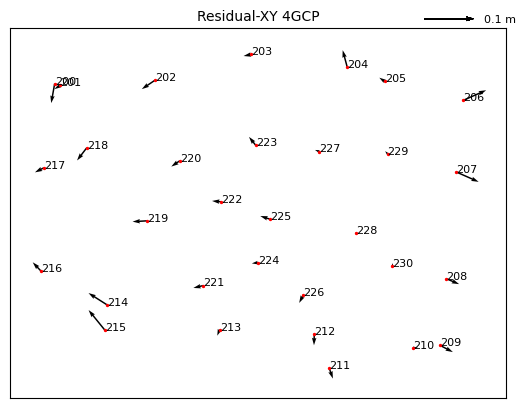

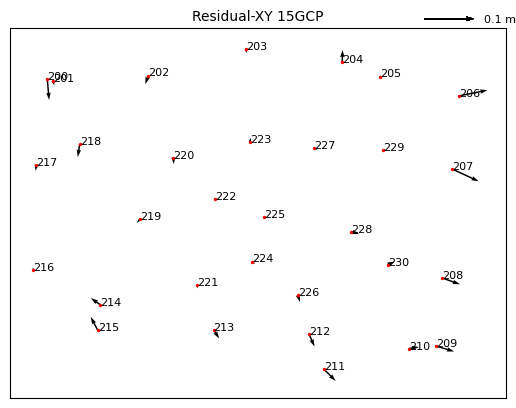

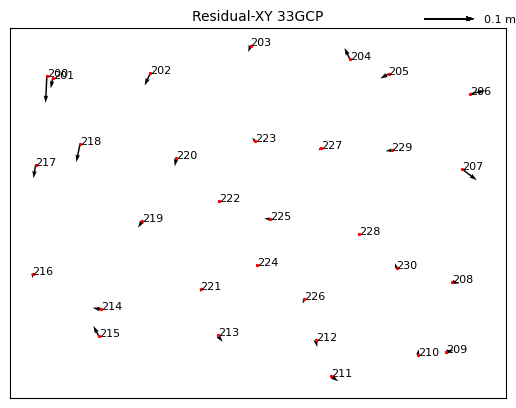

In [37]:
"""[MATCH-AT] Residual-XY arrows"""
# XY-Residual of object points[error ellipse]
""" 
Compare the results from inpho projects, with Match-AT setting: GNSS off/ only GNSS on/ GNSS and shifts for z on
"""
# set the key length
lkey = 0.1
# set the scale factor
scalef = 5
prj_list = [prj_4GCP_Inpho, prj_15GCP_Inpho, prj_33GCP_Inpho]
legend_list = ["4GCP", "15GCP", "33GCP"]
for prj, legend in zip(prj_list, legend_list):
    # fig, ax = plt.subplots()
    origin = np.array([prj.cp_residual[:, 3], prj.cp_residual[:, 4]])
    rs_x = prj.cp_residual[:, 0]
    rs_y = prj.cp_residual[:, 1]
    # plot
    Q = plt.quiver(*origin,
                   rs_x*scalef,
                   rs_y*scalef,
                   angles='xy',
                   scale_units='inches',
                   scale=1,
                   width=0.003)
    plt.scatter(*origin, color='r', s=2)
    plt.scatter(prj.cp_residual[:, 3]+rs_x*10000,
                prj.cp_residual[:, 4]+rs_y*10000, s=0)

    for i, txt in enumerate(prj.cp_id):
        plt.annotate(str(txt), (prj.cp_residual[i, 3], prj.cp_residual[i, 4]),
                     size=8, color='black')

    qk = plt.quiverkey(Q, X=0.85, Y=0.9, U=lkey*scalef,
                       label='0.1 m',
                       fontproperties={'size': 8},
                       labelpos='E',
                       coordinates='figure')

   # disabling xticks by Setting xticks to an empty list
    plt.xticks([])

    # disabling yticks by setting yticks to an empty list
    plt.yticks([])
    # w, h = fig.get_size_inches()
    # fig.set_size_inches(w * zoom, h * zoom)
    plt.title('Residual-XY '+legend, fontsize=10)
    plt.show()

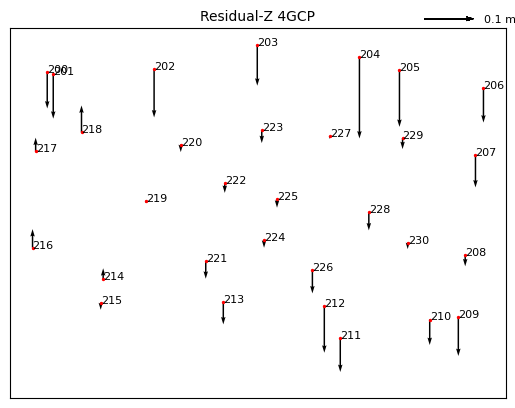

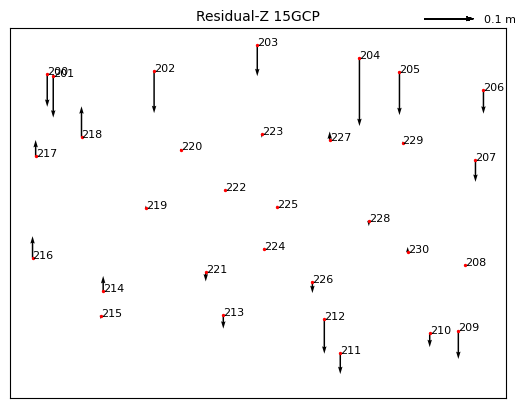

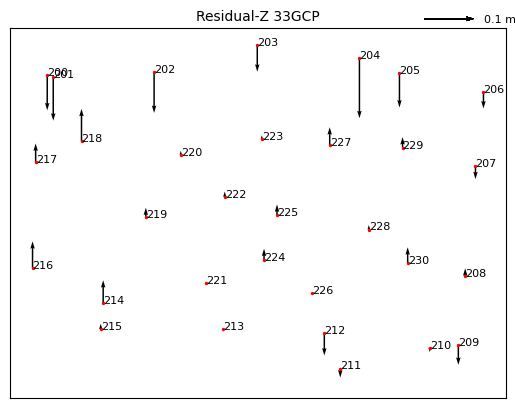

In [34]:
"""[MATCH-AT] Residual-Z arrows"""
# XY-Residual of object points[error ellipse]
""" 
Compare the results from inpho projects, with Match-AT setting: GNSS off/ only GNSS on/ GNSS and shifts for z on
"""
zoom = 2
# set the key length
lkey = 0.1
# set the scale factor
scalef = 5
prj_list = [prj_4GCP_Inpho, prj_15GCP_Inpho, prj_33GCP_Inpho]
legend_list = ["4GCP", "15GCP", "33GCP"]
for prj, legend in zip(prj_list, legend_list):
    # fig, ax = plt.subplots()
    origin = np.array([prj.cp_residual[:, 3], prj.cp_residual[:, 4]])
    rs_z = prj.cp_residual[:, 2]

    # plot
    Q = plt.quiver(*origin,
                   np.zeros_like(rs_x),
                   rs_z*scalef,
                   angles='xy',
                   scale_units='inches',
                   scale=1,
                   width=0.003)
    plt.scatter(*origin, color='r', s=2)
    plt.scatter(prj.cp_residual[:, 3], prj.cp_residual[:, 4]+rs_z*10000, s=0)

    for i, txt in enumerate(prj.cp_id):
        plt.annotate(str(txt), (prj.cp_residual[i, 3], prj.cp_residual[i, 4]),
                     size=8, color='black')

    qk = plt.quiverkey(Q, X=0.85, Y=0.9, U=lkey*scalef,
                       label='0.1 m',
                       fontproperties={'size': 8},
                       labelpos='E',
                       coordinates='figure')

   # disabling xticks by Setting xticks to an empty list
    plt.xticks([])

    # disabling yticks by setting yticks to an empty list
    plt.yticks([])
    plt.title('Residual-Z '+legend, fontsize=10)
    plt.show()

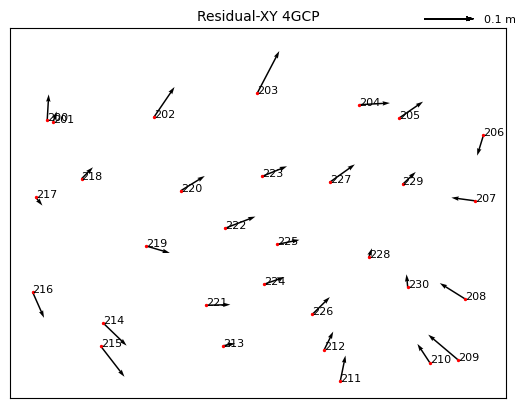

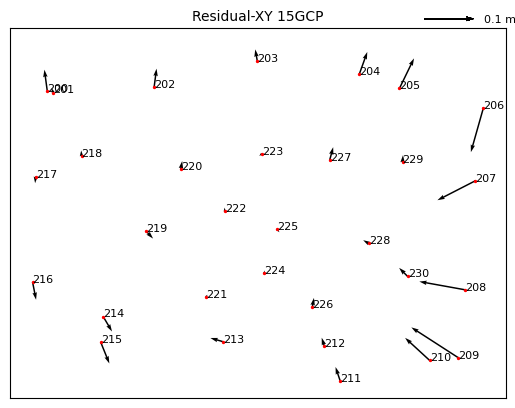

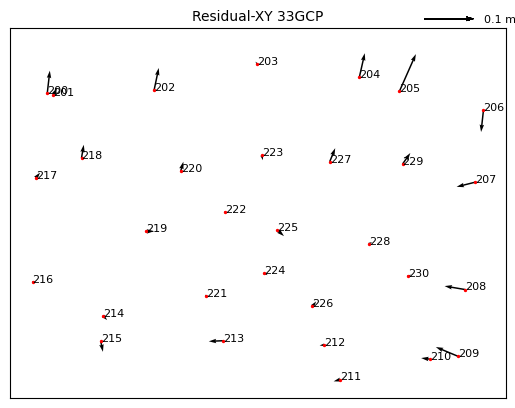

In [35]:
"""[RS] Residual-XY arrows"""
# XY-Residual of object points[error ellipse]
""" 
Compare the results from inpho projects, with Match-AT setting: GNSS off/ only GNSS on/ GNSS and shifts for z on
"""
# set the key length
lkey = 0.1
# set the scale factor
scalef = 5
Inpho_prj_list = [prj_4GCP_Inpho, prj_4GCP_Inpho, prj_4GCP_Inpho]
RS_prj_list = [Residual_RS_4gcp, Residual_RS_15gcp, Residual_RS_33gcp]
legend_list = ["4GCP", "15GCP", "33GCP"]
for Inpho_prj, RS_prj, legend in zip(Inpho_prj_list, RS_prj_list, legend_list):
    # fig, ax = plt.subplots()
    origin = np.array([Inpho_prj.cp_residual[:, 3], Inpho_prj.cp_residual[:, 4]])
    rs_x = np.array([pt[0]for pt in RS_prj])
    rs_y = np.array([pt[1]for pt in RS_prj])
    # plot
    Q = plt.quiver(*origin,
                   rs_x*scalef,
                   rs_y*scalef,
                   angles='xy',
                   scale_units='inches',
                   scale=1,
                   width=0.003)
    plt.scatter(*origin, color='r', s=2)
    plt.scatter(Inpho_prj.cp_residual[:, 3]+rs_x*10000,
                Inpho_prj.cp_residual[:, 4]+rs_y*10000, s=0)

    for i, txt in enumerate(Inpho_prj.cp_id):
        plt.annotate(str(txt), (Inpho_prj.cp_residual[i, 3], Inpho_prj.cp_residual[i, 4]),
                     size=8, color='black')

    qk = plt.quiverkey(Q, X=0.85, Y=0.9, U=lkey*scalef,
                       label='0.1 m',
                       fontproperties={'size': 8},
                       labelpos='E',
                       coordinates='figure')

   # disabling xticks by Setting xticks to an empty list
    plt.xticks([])

    # disabling yticks by setting yticks to an empty list
    plt.yticks([])
    # w, h = fig.get_size_inches()
    # fig.set_size_inches(w * zoom, h * zoom)
    plt.title('Residual-XY '+legend, fontsize=10)
    plt.show()

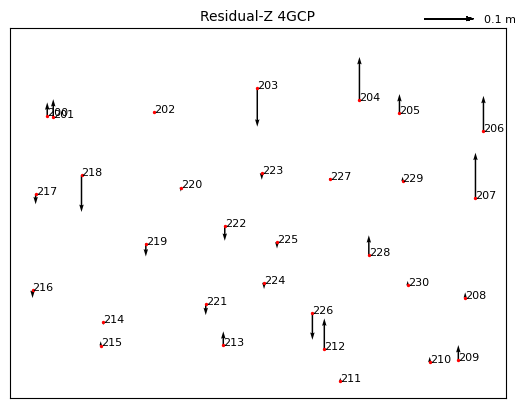

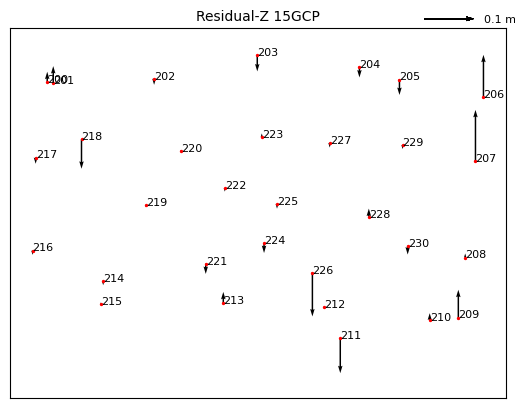

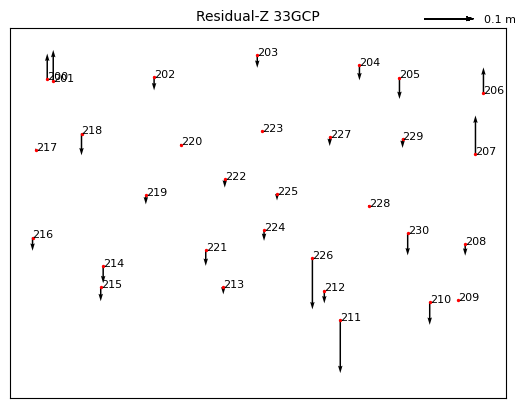

In [36]:
"""[RS] Residual-Z arrows"""
# XY-Residual of object points[error ellipse]
""" 
Compare the results from inpho projects, with Match-AT setting: GNSS off/ only GNSS on/ GNSS and shifts for z on
"""
# set the scale factor
scalef = 5
Inpho_prj_list = [prj_4GCP_Inpho, prj_4GCP_Inpho, prj_4GCP_Inpho]
RS_prj_list = [Residual_RS_4gcp, Residual_RS_15gcp, Residual_RS_33gcp]
legend_list = ["4GCP", "15GCP", "33GCP"]
for Inpho_prj, RS_prj, legend in zip(Inpho_prj_list, RS_prj_list, legend_list):
    # fig, ax = plt.subplots()
    origin = np.array([prj.cp_residual[:, 3], prj.cp_residual[:, 4]])
    rs_z = np.array([pt[2]for pt in RS_prj])
    # plot
    Q = plt.quiver(*origin,
                   np.zeros_like(rs_x),
                   rs_z*scalef,
                   angles='xy',
                   scale_units='inches',
                   scale=1,
                   width=0.003)
    plt.scatter(*origin, color='r', s=2)
    plt.scatter(Inpho_prj.cp_residual[:, 3],
                Inpho_prj.cp_residual[:, 4]+rs_z*10000, s=0)

    for i, txt in enumerate(Inpho_prj.cp_id):
        plt.annotate(str(txt), (Inpho_prj.cp_residual[i, 3], Inpho_prj.cp_residual[i, 4]),
                     size=8, color='black')

    qk = plt.quiverkey(Q, X=0.85, Y=0.9, U=0.1*scalef,
                       label='0.1 m',
                       fontproperties={'size': 8},
                       labelpos='E',
                       coordinates='figure')

   # disabling xticks by Setting xticks to an empty list
    plt.xticks([])

    # disabling yticks by setting yticks to an empty list
    plt.yticks([])
    # w, h = fig.get_size_inches()
    # fig.set_size_inches(w * zoom, h * zoom)
    plt.title('Residual-Z '+legend, fontsize=10)
    plt.show()

"""[MATCH-AT] Residual-XY Ellipse/XY arrows of Match-AT"""
# XY-Residual of object points[error ellipse]
""" 
Compare the results from inpho projects, with Match-AT setting: GNSS off/ only GNSS on/ GNSS and shifts for z on
"""
# XY-Residuals of 3 prjs
residual_scale = 10
prj_list = [prj_4GCP_Inpho, prj_15GCP_Inpho, prj_33GCP_Inpho]
legend_list = ["4GCP", "15GCP", "33GCP"]
fig = go.Figure()

for prj, legend in zip(prj_list, legend_list):
    # scatter check points
    fig.add_trace(go.Scatter(
        # mode='markers+text'if prj == prj_list[0] else "markers",
        mode='markers+text',
        x=prj.cp_residual[:, 3],
        y=prj.cp_residual[:, 4],
        text=[str(id) for id in prj.cp_id],
        marker={"symbol": "square-open-dot",
                "color": 'mediumseagreen', "size": 8},
        legendgroup="[" + legend + "] check points",
        showlegend=True,
        name="[" + legend + "] check points"
    )
    )
    # scatter control points
    fig.add_trace(go.Scatter(
        # mode='markers+text' if prj == prj_list[0] else "markers",
        mode='markers+text',
        x=prj.gcp_residual[:, 3],
        y=prj.gcp_residual[:, 4],
        text=[str(id) for id in prj.gcp_id],
        marker={"symbol": "triangle-up-open-dot",
                "color": 'skyblue', "size": 8},
        legendgroup="[" + legend + "] control points",
        showlegend=True,
        name="[" + legend + "] control points"
    )
    )
    # Arrow - XY
    # check points
    for ind, pt in enumerate(prj.cp_residual):
        fig.add_trace(go.Scatter(
            mode='lines',
            x=[pt[3], pt[3]+pt[0]*1000*residual_scale],
            y=[pt[4], pt[4]+pt[1]*1000*residual_scale],
            line={"color": 'mediumseagreen', "width": 2},
            legendgroup="[" + legend +
            "] XY-residual vector at check points",
            showlegend=(ind == 0),
            name="[Match-AT-" + legend + "] XY-residual vector at check points"
        )
        )
    # control points
    for ind, pt in enumerate(prj.gcp_residual):
        fig.add_trace(go.Scatter(
            mode='lines',
            x=[pt[3], pt[3]+pt[0]*1000*residual_scale],
            y=[pt[4], pt[4]+pt[1]*1000*residual_scale],
            line={"color": 'skyblue', "width": 2},
            legendgroup="[" + legend +
            "] XY-residual vector at control points",
            showlegend=(ind == 0),
            name="[Match-AT-" + legend + "] XY-residual vector at control points"
        )
        )

fig.update_traces(textposition='top left')
fig.update_layout(title="[Match-AT]XY-residual vector of Object Points",
                  xaxis={"showgrid": False, "zeroline": False},
                  yaxis={"showgrid": False, "zeroline": False})
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()
fig.write_html("./Results/RS_analysis/Inpho_pt_xy_residual_vector.html")

"""[15GCP + 18CP] Residual-Z arrows of Match-AT"""
# Z-Residual of object points[error ellipse]
""" 
Compare the results from inpho projects, with Match-AT setting: GNSS off/ only GNSS on/ GNSS and shifts for z on
"""
# Z-Residuals of 3 prjs
residual_scale = 10
prj_list = [prj_4GCP_Inpho, prj_4GCP_Inpho, prj_4GCP_Inpho,]
legend_list = ["4GCP", "15GCP", "33GCP"]
fig = go.Figure()

for prj, legend in zip(prj_list, legend_list):
    # scatter check points
    fig.add_trace(go.Scatter(
        # mode='markers+text'if prj == prj_list[0] else "markers",
        mode='markers+text',
        x=prj.cp_residual[:, 3],
        y=prj.cp_residual[:, 4],
        text=[str(id) for id in prj.cp_id],
        marker={"symbol": "square-open-dot",
                "color": 'mediumseagreen', "size": 8},
        legendgroup="[" + legend + "] check points",
        showlegend=True,
        name="[" + legend + "] check points"
    )
    )
    # scatter control points
    fig.add_trace(go.Scatter(
        # mode='markers+text' if prj == prj_list[0] else "markers",
        mode='markers+text',
        x=prj.gcp_residual[:, 3],
        y=prj.gcp_residual[:, 4],
        text=[str(id) for id in prj.gcp_id],
        marker={"symbol": "triangle-up-open-dot",
                "color": 'skyblue', "size": 8},
        legendgroup="[" + legend + "] control points",
        showlegend=True,
        name="[" + legend + "] control points"
    )
    )
    # Z vector
    # check points
    for ind, pt in enumerate(prj.cp_residual):
        fig.add_trace(go.Scatter(
            mode='lines',
            x=[pt[3], pt[3]],
            y=[pt[4], pt[4] + pt[2] * 1000.0 * residual_scale],
            line={"color": 'mediumseagreen', "width": 2},
            legendgroup="[" + legend +
            "] Z-residual vector at check points",
            showlegend=(ind == 0),
            name="[" + legend + "] Z-residual vector at check points"
        )
        )
    # control points
    for ind, pt in enumerate(prj.gcp_residual):
        fig.add_trace(go.Scatter(
            mode='lines',
            x=[pt[3], pt[3]],
            y=[pt[4], pt[4] + pt[2] * 1000.0 * residual_scale],
            line={"color": 'skyblue', "width": 2},
            legendgroup="[" + legend +
            "] Z-residual vector at control points",
            showlegend=(ind == 0),
            name="[" + legend + "] Z-residual vector at control points"
        )
        )


fig.update_traces(textposition='top left')
fig.update_layout(title="[Match-AT]Z vector of Object Points",
                  xaxis={"showgrid": False, "zeroline": False},
                  yaxis={"showgrid": False, "zeroline": False})
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()
fig.write_html("./Results/RS_analysis/Inpho_pt_z_residual_vector.html")

"""[15GCP] Residual-XY arrows of RS"""
# XY-Residual of object points[error ellipse]
""" 
Compare the results from inpho projects, with Match-AT setting: GNSS off/ only GNSS on/ GNSS and shifts for z on
"""
# XY-Residuals of 3 prjs
residual_scale = 10
Inpho_prj_list = [prj_4GCP_Inpho, prj_4GCP_Inpho, prj_4GCP_Inpho]
RS_prj_list = [Residual_RS_4gcp, Residual_RS_15gcp, Residual_RS_33gcp]
legend_list = ["4GCP", "15GCP", "33GCP"]
fig = go.Figure()

for Inpho_prj, RS_prj, legend in zip(Inpho_prj_list, RS_prj_list, legend_list):
    # scatter check points
    fig.add_trace(go.Scatter(
        # mode='markers+text'if prj == prj_list[0] else "markers",
        mode='markers+text',
        x=Inpho_prj.cp_residual[:, 3],
        y=Inpho_prj.cp_residual[:, 4],
        text=[str(id) for id in Inpho_prj.cp_id],
        marker={"symbol": "square-open-dot", "color": 'tomato', "size": 8},
        legendgroup="[" + legend + "] check points",
        showlegend=True,
        name="[RS-" + legend + "] check points"
    )
    )

    # Arrow - XY
    # check points
    for ind, pt_Inpho in enumerate(Inpho_prj.cp_residual):
        fig.add_trace(go.Scatter(
            mode='lines',
            x=[pt_Inpho[3], pt_Inpho[3]+RS_prj[ind][0]*1000*residual_scale],
            y=[pt_Inpho[4], pt_Inpho[4]+RS_prj[ind][1]*1000*residual_scale],
            line={"color": 'tomato', "width": 2},
            legendgroup="[" + legend +
            "] XY-residual vector at check points",
            showlegend=(ind == 0),
            name="[RS-" + legend + "] XY-residual vector at check points"
        )
        )
        ind += 1


fig.update_traces(textposition='top left')
fig.update_layout(title="[RS]XY-residual vector of Object Points",
                  xaxis={"showgrid": False, "zeroline": False},
                  yaxis={"showgrid": False, "zeroline": False})
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()
fig.write_html("./Results/RS_analysis/RS_pt_xy_residual_vector.html")

"""[15GCP] Residual-Z arrows of RS"""
# Z-Residual of object points[error ellipse]
""" 
Compare the results from inpho projects, with Match-AT setting: GNSS off/ only GNSS on/ GNSS and shifts for z on
"""
# Z-Residuals of 3 prjs
residual_scale = 10
Inpho_prj_list = [prj_4GCP_Inpho, prj_4GCP_Inpho, prj_4GCP_Inpho]
RS_prj_list = [Residual_RS_4gcp, Residual_RS_15gcp, Residual_RS_33gcp]
legend_list = ["4GCP", "15GCP", "33GCP"]
fig = go.Figure()

for Inpho_prj, RS_prj, legend in zip(Inpho_prj_list, RS_prj_list, legend_list):
    # scatter check points
    fig.add_trace(go.Scatter(
        # mode='markers+text'if prj == prj_list[0] else "markers",
        mode='markers+text',
        x=Inpho_prj.cp_residual[:, 3],
        y=Inpho_prj.cp_residual[:, 4],
        text=[str(id) for id in Inpho_prj.cp_id],
        marker={"symbol": "square-open-dot", "color": 'tomato', "size": 8},
        legendgroup="[" + legend + "] check points",
        showlegend=True,
        name="[RS-" + legend + "] check points"
    )
    )

    # Arrow - XY
    # check points
    for ind, pt_Inpho in enumerate(Inpho_prj.cp_residual):
        fig.add_trace(go.Scatter(
            mode='lines',
            x=[pt_Inpho[3], pt_Inpho[3]],
            y=[pt_Inpho[4], pt_Inpho[4] + RS_prj[ind]
                [2] * 1000.0 * residual_scale],
            line={"color": 'tomato', "width": 2},
            legendgroup="[" + legend +
            "] Z-residual vector at check points",
            showlegend=(ind == 0),
            name="[RS-" + legend + "] Z-residual vector at check points"
        )
        )
        ind += 1


fig.update_traces(textposition='top left')
fig.update_layout(title="[RS]Z-residual vector of Object Points",
                  xaxis={"showgrid": False, "zeroline": False},
                  yaxis={"showgrid": False, "zeroline": False})
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()
fig.write_html("./Results/RS_analysis/RS_pt_z_residual_vector.html")

# Tie points check - Line scatter -> Only to define if the priori setting of GNSS and IMU observations makes a big difference
# Compare the projects in <test_priori> folder. The priori of GNSS and IMU observations is set to be 10m, 1000m and none for the bundle adjustment

EO_params = ['x', 'y', 'z']

prj_names = [project_10m_std, project_1000m_std, project_none]
prj_legend_names = ['10m', '1000m', 'none']
prj_colors = ['limegreen', 'skyblue', 'salmon']

diff_eo = [
    np.array([project_10m_std.tie_points_adjusted_coordinates]) -
    np.array([project_none.tie_points_adjusted_coordinates]),
    np.array([project_1000m_std.tie_points_adjusted_coordinates]) -
    np.array([project_none.tie_points_adjusted_coordinates]),
]
diff_legend_names = ['10m-none', '1000m-none']
diff_colors = ['limegreen', 'skyblue']

for i, diff_matrix in enumerate(diff_eo):
    diff_eo[i] = np.reshape(diff_matrix, [diff_matrix.shape[1], 3])
legend_diff_names = ['10m-1000m', '10m-none', '1000m-none']
fig1 = make_subplots(rows=3, cols=1,
                     subplot_titles=["x[m] - test priori",
                                     "y[m] - test priori",
                                     "z[m] - test priori"
                                     ],
                     shared_xaxes=True)
x_axis = prj_names[0].tie_point_id
for prj_name, prj_color in zip(prj_names, prj_colors):
    ind_prj = prj_names.index(prj_name)
    for ind_eo, EO_param in enumerate(EO_params):
        y1_axis = np.array([eo[ind_eo]
                           for eo in prj_name.tie_points_adjusted_coordinates])
        fig1.add_trace(go.Scatter(
            mode='lines',
            x=x_axis,
            y=y1_axis,
            marker_color=prj_color,
            legendgroup=ind_prj,
            showlegend=True,
            name=EO_param + " - " + prj_legend_names[ind_prj]
        ),
            row=int((ind_eo % 3) + 1),
            col=1
        )
fig1.update_layout(
    xaxis=dict(
        showexponent='all',
        exponentformat='e'
    )
)
fig1.update_xaxes(title_text="Tie points index", row=3, col=1)
fig1.show()

fig2 = make_subplots(rows=3, cols=1,
                     subplot_titles=["Δx [m] ",
                                     "Δy [m] ",
                                     "Δz [m]"],
                     shared_xaxes=True)
for diff_matrix, diff_color in zip(diff_eo, diff_colors):
    ind_diff_matrix = diff_colors.index(diff_color)
    for ind_eo_2, EO_param_2 in enumerate(EO_params):
        y2_axis = diff_matrix[:, ind_eo_2]
        fig2.add_trace(go.Scatter(
            mode='lines',
            x=x_axis,
            y=y2_axis,
            marker_color=diff_color,
            legendgroup=ind_diff_matrix,
            showlegend=True,
            name="Δ" + EO_param_2 + " - " + diff_legend_names[ind_diff_matrix]
        ),
            row=int((ind_eo_2 % 3) + 1),
            col=1
        )
fig2.update_layout(
    xaxis=dict(
        showexponent='all',
        exponentformat='e'
    )
)
fig2.update_xaxes(title_text="Tie points index", row=3, col=1)
fig2.show()

fig1.write_html("./Results/UCE-M3/EO_tiepoints_testpriori.html")
fig2.write_html("./Results/UCE-M3/EOdiff_tiepoints_testpriori.html")

project_RS_dsm_dgm = [-57.7226, 38.1197, 1.3245]
project_SURE_dsm_dgm = [-53.3866, 38.3201, 1.3221]

groups = [project_RS_dsm_dgm, project_SURE_dsm_dgm]
colors = ["red", "blue"]
legend = ["RS project", "SURE project"]
point = ["Min", "Max", "Mean"]
fig = go.Figure()
for i, group in enumerate(groups):
    group_annotation = []
    for j, value in enumerate(group):
        group_annotation.append(point[j] + ": " + str(value))
    fig.add_trace(go.Scatter(
        name=legend[int(i % 2)],
        x=group,
        y=[int(i % 2) + 1, int(i % 2) + 1, int(i % 2) + 1],
        text=group_annotation,
        textposition=("top center" if int(i % 2) == 0 else "bottom center"),
        textfont=dict(size=10, color=colors[int(i % 2)]),
        mode="markers+text",
        legendgroup=legend[int(i % 2)],
        showlegend=(i == 0 or i == 1),
        marker=dict(color=colors[int(i % 2)], size=10, symbol=["circle", "square", "circle"])))

fig.add_shape(
    dict(type="line",
         y0=1,
         y1=1,
         x0=project_RS_dsm_dgm[0],
         x1=project_RS_dsm_dgm[1],
         line=dict(color="red", width=2)))

fig.add_shape(
    dict(type="line",
         y0=2,
         y1=2,
         x0=project_SURE_dsm_dgm[0],
         x1=project_SURE_dsm_dgm[1],
         line=dict(color="blue", width=2)))

fig.update_traces(opacity=0.6)
fig.update_layout(
    yaxis={"ticktext": ["RS project", "SURE project"],
           "tickvals": [0, 1, 2, 3],
           "showgrid": False,
           "zeroline": False},
    xaxis={"showgrid": True, "zeroline": False},
    margin=dict(l=20, r=20, t=30, b=20),
    height=200,
    width=1000
    # autosize=True
)
fig.update_xaxes(automargin=True)
fig.update_yaxes(tick0=-1.0, dtick=1.0, showticklabels=False)
fig.show()
fig.write_html("./Results/UCE-M3/diff_DSM_DGM_max&min.html")

H_SURE_GCP = [-0.05716827392578239, -0.032199859619140625, 0.08586875915527514,
              0.07599975585937457, 0.15158355712890526, 0.05716056823730398,
              0.09622200012206861, 0.019538192749024574, 0.08180572509765582,
              0.0026139831542977277, 0.03273872375488196, 0.04035179138183764,
              -0.005705337524414489, 0.06347549438476463, 0.02775535583496236]
H_RS_GCP = [0.04951599121093864, 0.04396301269531122, 0.017412109375001705,
            0.03479721069335895, 0.10306060791015526, 0.07546157836913991,
            0.033727722167967045, 0.008857040405274574, 0.02158500671386676,
            0.00398918151855554, 0.011214294433592897, 0.043626708984376705,
            0.009084243774413636, 0.02474868774413963, 0.03875122070312642]
gcp_ind = [100, 103, 104, 106, 107, 110, 113,
           114, 116, 117, 120, 123, 126, 129, 132]
x_axis = np.arange(0, len(gcp_ind))
fig = go.Figure()
fig.add_trace(go.Scatter(
    name="RS project",
    x=x_axis,
    y=H_RS_GCP,
    mode="lines+markers",
    legendgroup="RS project",
    showlegend=True,
    marker_color="red"
))
fig.add_trace(go.Scatter(
    name="SURE project",
    x=x_axis,
    y=H_SURE_GCP,
    mode="lines+markers",
    legendgroup="SURE project",
    showlegend=True,
    marker_color="blue"
))

fig.update_traces(opacity=0.6)
fig.update_layout(
    xaxis={"title": "Point ID",
           "ticktext": [str(id) for id in gcp_ind],
           "tickvals": x_axis,
           "showgrid": False,
           "zeroline": False},
    yaxis={"title": "Height [m]",
           "showgrid": True,
           "zeroline": False},
    # autosize=True
)
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(showticklabels=False)
fig.show()
fig.write_html("./Results/UCE-M3/diff_DSM_GCP.html")

project_RS_dsm_gcp = [0.0040, 0.1031, 0.0347]
project_SURE_dsm_gcp = [-0.0057, 0.1516, 0.0574]

groups = [project_RS_dsm_gcp, project_SURE_dsm_gcp]
colors = ["red", "blue"]
legend = ["RS project", "SURE project"]
point = ["Min", "Max", "Mean"]
fig = go.Figure()
for i, group in enumerate(groups):
    group_annotation = []
    for j, value in enumerate(group):
        group_annotation.append(point[j] + ": " + str(value))
    fig.add_trace(go.Scatter(
        name=legend[int(i % 2)],
        x=group,
        y=[int(i % 2) + 1, int(i % 2) + 1, int(i % 2) + 1],
        text=group_annotation,
        textposition=("top center" if int(i % 2) == 0 else "bottom center"),
        textfont=dict(size=10, color=colors[int(i % 2)]),
        mode="markers+text",
        legendgroup=legend[int(i % 2)],
        showlegend=(i == 0 or i == 1),
        marker=dict(color=colors[int(i % 2)], size=10, symbol=["circle", "square", "circle"])))

fig.add_shape(
    dict(type="line",
         y0=1,
         y1=1,
         x0=project_RS_dsm_gcp[0],
         x1=project_RS_dsm_gcp[1],
         line=dict(color="red", width=2)))

fig.add_shape(
    dict(type="line",
         y0=2,
         y1=2,
         x0=project_SURE_dsm_gcp[0],
         x1=project_SURE_dsm_gcp[1],
         line=dict(color="blue", width=2)))

fig.update_traces(opacity=0.6)
fig.update_layout(
    yaxis={"ticktext": ["RS project", "SURE project"],
           "tickvals": [0, 1, 2, 3],
           "showgrid": False,
           "zeroline": False},
    xaxis={"showgrid": True, "zeroline": False},
    margin=dict(l=20, r=20, t=30, b=20),
    height=200,
    width=1000
    # autosize=True
)
fig.update_xaxes(automargin=True)
fig.update_yaxes(tick0=-1.0, dtick=1.0, showticklabels=False)
fig.show()
fig.write_html("./Results/UCE-M3/diff_DSM_GCP_max&min.html")

project_RS_dsm_bdom = [-58.3006, 38.3319, -0.1941]
project_SURE_dsm_bdom = [-53.9428, 48.3382, -0.1977]

groups = [project_RS_dsm_bdom, project_SURE_dsm_bdom]
colors = ["red", "blue"]
legend = ["RS project", "SURE project"]
point = ["Min", "Max", "Mean"]
fig = go.Figure()
for i, group in enumerate(groups):
    group_annotation = []
    for j, value in enumerate(group):
        group_annotation.append(point[j] + ": " + str(value))
    fig.add_trace(go.Scatter(
        name=legend[int(i % 2)],
        x=group,
        y=[int(i % 2) + 1, int(i % 2) + 1, int(i % 2) + 1],
        text=group_annotation,
        textposition=("top center" if int(i % 2) == 0 else "bottom center"),
        textfont=dict(size=10, color=colors[int(i % 2)]),
        mode="markers+text",
        legendgroup=legend[int(i % 2)],
        showlegend=(i == 0 or i == 1),
        marker=dict(color=colors[int(i % 2)], size=10, symbol=["circle", "square", "circle"])))

fig.add_shape(
    dict(type="line",
         y0=1,
         y1=1,
         x0=project_RS_dsm_bdom[0],
         x1=project_RS_dsm_bdom[1],
         line=dict(color="red", width=2)))

fig.add_shape(
    dict(type="line",
         y0=2,
         y1=2,
         x0=project_SURE_dsm_bdom[0],
         x1=project_SURE_dsm_bdom[1],
         line=dict(color="blue", width=2)))

fig.update_traces(opacity=0.6)
fig.update_layout(
    yaxis={"ticktext": ["RS project", "SURE project"],
           "tickvals": [0, 1, 2, 3],
           "showgrid": False,
           "zeroline": False},
    xaxis={"showgrid": True, "zeroline": False},
    margin=dict(l=20, r=20, t=30, b=20),
    height=200,
    width=1000
    # autosize=True
)
fig.update_xaxes(automargin=True)
fig.update_yaxes(tick0=-1.0, dtick=1.0, showticklabels=False)
fig.show()
fig.write_html("./Results/UCE-M3/diff_DSM_bDOM_max&min.html")

project_RS_dsm_cp = [0.0338, -0.0719, -0.0312]
project_SURE_dsm_cp = [-0.1285, 0.0392, -0.0583]

groups = [project_RS_dsm_cp, project_SURE_dsm_cp]
colors = ["red", "blue"]
legend = ["RS project", "SURE project"]
point = ["Min", "Max", "Mean"]
fig = go.Figure()
for i, group in enumerate(groups):
    group_annotation = []
    for j, value in enumerate(group):
        group_annotation.append(point[j] + ": " + str(value))
    fig.add_trace(go.Scatter(
        name=legend[int(i % 2)],
        x=group,
        y=[int(i % 2) + 1, int(i % 2) + 1, int(i % 2) + 1],
        text=group_annotation,
        textposition=("top center" if int(i % 2) == 0 else "bottom center"),
        textfont=dict(size=10, color=colors[int(i % 2)]),
        mode="markers+text",
        legendgroup=legend[int(i % 2)],
        showlegend=(i == 0 or i == 1),
        marker=dict(color=colors[int(i % 2)], size=10, symbol=["circle", "square", "circle"])))

fig.add_shape(
    dict(type="line",
         y0=1,
         y1=1,
         x0=project_RS_dsm_cp[0],
         x1=project_RS_dsm_cp[1],
         line=dict(color="red", width=2)))

fig.add_shape(
    dict(type="line",
         y0=2,
         y1=2,
         x0=project_SURE_dsm_cp[0],
         x1=project_SURE_dsm_cp[1],
         line=dict(color="blue", width=2)))

fig.update_traces(opacity=0.6)
fig.update_layout(
    yaxis={"ticktext": ["RS project", "SURE project"],
           "tickvals": [0, 1, 2, 3],
           "showgrid": False,
           "zeroline": False},
    xaxis={"showgrid": True, "zeroline": False},
    margin=dict(l=20, r=20, t=30, b=20),
    height=200,
    width=1000
    # autosize=True
)
fig.update_xaxes(automargin=True)
fig.update_yaxes(tick0=-1.0, dtick=1.0, showticklabels=False)
fig.show()
fig.write_html("./Results/UCE-M3/diff_DSM_CP_max&min.html")

H_SURE_CP = [0.02422142, 0.011356735, 0.090472412, 0.128596573, 0.05973587, 0.091241455,
             0.099732437, 0.11425621, -0.03921875, 0.030930901, 0.049991302, 0.040790863,
             0.050324631, 0.05153717, 0.023138275, 0.0426091, 0.094522476, 0.084982224]
H_RS_CP = [0.035734177, 0.007179642, 0.048400116, 0.068669586, 0.041495895, 0.066485977,
           0.050072708, 0.045740433, -0.033837166, 0.017658615, 0.02375, 0.017031021,
           0.026166153, 0.006807938, 0.007625809, 0.00931633, 0.05115509, 0.071899719]
cp_ind = [101, 102, 108, 109, 105, 111, 112, 115,
          118, 119, 121, 122, 124, 125, 127, 128, 130, 131]
x_axis = np.arange(0, len(cp_ind))
fig = go.Figure()
fig.add_trace(go.Scatter(
    name="RS project",
    x=x_axis,
    y=H_RS_CP,
    mode="lines+markers",
    legendgroup="RS project",
    showlegend=True,
    marker_color="red"
))
fig.add_trace(go.Scatter(
    name="SURE project",
    x=x_axis,
    y=H_SURE_CP,
    mode="lines+markers",
    legendgroup="SURE project",
    showlegend=True,
    marker_color="blue"
))

fig.update_traces(opacity=0.6)
fig.update_layout(
    xaxis={"title": "Point ID",
           "ticktext": [str(id) for id in cp_ind],
           "tickvals": x_axis,
           "showgrid": False,
           "zeroline": False},
    yaxis={"title": "Height [m]",
           "showgrid": True,
           "zeroline": False},
    # autosize=True
)
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(showticklabels=False)
fig.show()
fig.write_html("./Results/UCE-M3/diff_DSM_CP.html")